In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings

In [53]:
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

diabetes_df = pd.read_sql_query('select * from diabetes',con=engine2)

In [54]:
# look at data info 
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pregnancies        763 non-null    int64  
 1   glucose            763 non-null    int64  
 2   blood_pressure     763 non-null    int64  
 3   skin_thickness     763 non-null    int64  
 4   insulin            763 non-null    int64  
 5   bmi                763 non-null    float64
 6   diabetes_pedigree  763 non-null    float64
 7   age                763 non-null    int64  
 8   outcome            763 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


Dataset is with proper data types now perform below 

# EDA
#### look for missing values 
#### CHECK MEAN
#### look for OUTLIERS 
#### SEE DISTRIBUTIONS 


In [55]:
# check if there is any null values 
for column_name in diabetes_df.columns:
    print (f'{column_name} missing value % is', (1- diabetes_df[column_name].count()/len(diabetes_df))*100)

pregnancies missing value % is 0.0
glucose missing value % is 0.0
blood_pressure missing value % is 0.0
skin_thickness missing value % is 0.0
insulin missing value % is 0.0
bmi missing value % is 0.0
diabetes_pedigree missing value % is 0.0
age missing value % is 0.0
outcome missing value % is 0.0


In [61]:
# no missing values now lets see sample data
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,5,44,62,0,0,25.0,0.587,36,0
1,2,56,56,28,45,24.2,0.332,22,0
2,9,57,80,37,0,32.8,0.096,41,0
3,0,57,60,0,0,21.7,0.735,67,0
4,3,61,82,28,0,34.4,0.243,46,0


In [57]:
diabetes_df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
for column_name in diabetes_df.columns:
    print( f'{column_name} zero count {diabetes_df[diabetes_df[column_name]==0].count()}')

pregnancies zero count pregnancies          111
glucose              111
blood_pressure       111
skin_thickness       111
insulin              111
bmi                  111
diabetes_pedigree    111
age                  111
outcome              111
dtype: int64
glucose zero count pregnancies          0
glucose              0
blood_pressure       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
age                  0
outcome              0
dtype: int64
blood_pressure zero count pregnancies          35
glucose              35
blood_pressure       35
skin_thickness       35
insulin              35
bmi                  35
diabetes_pedigree    35
age                  35
outcome              35
dtype: int64
skin_thickness zero count pregnancies          227
glucose              227
blood_pressure       227
skin_thickness       227
insulin              227
bmi                  227
diabetes_pedigree    227
age                  227
outcome            

In [67]:
df= diabetes_df[diabetes_df['blood_pressure'] != 0]

In [70]:
df=df[df['insulin'] != 0]

In [73]:
df.corr()
diabetes_df=df

In [74]:
diabetes_df.groupby("outcome").count()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age
outcome,,,,,,,,
0,262,262,262,262,262,262,262,262
1,130,130,130,130,130,130,130,130


(array([149., 109.,  48.,  19.,  34.,  17.,   5.,   8.,   2.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

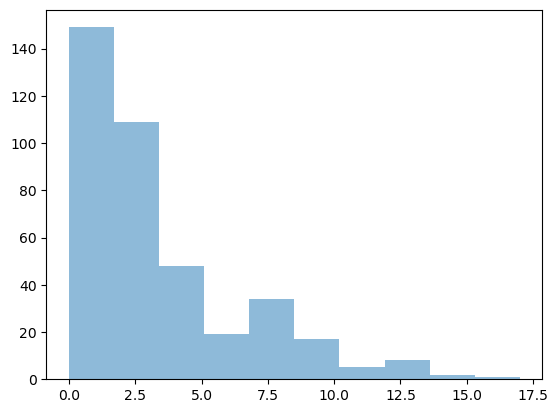

In [75]:
plt.hist(diabetes_df[['pregnancies']], alpha = .5 ) 

In [76]:
# see unique values
for column_name in diabetes_df.columns:
    print("Unique values in column {} are: {}".format(column_name, diabetes_df[column_name].unique()))

Unique values in column pregnancies are: [ 2 10  1  3  8  0  5  7  4 12  6 14  9 11 15 13 17]
Unique values in column glucose are: [ 56  68  71  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 176 177 179 180 181 184 186
 187 188 189 191 193 195 196 197 198]
Unique values in column blood_pressure are: [ 56  70  62 106  48  78  68  52  64  82  50  88  60  80  74  72  86  58
  66  65  90  30  76  24  54 100  85  84  44  38  46  98 110  92 102  94
  40]
Unique values in column skin_thickness are: [28 32 13 23 18 50 40 10 24 41 30 29 42 25 11 31 16 15 22 26 52 27 37 34
 21 19 14 12 47  7 39 45 17 36 33 60 20 35 48 46 38 43 44  8 51 49 56 63]
Unique

In [77]:
# some data in insulin and skin_thickness, blood_pressure,bmi  is zero they may be invalid?
diabetes_df[diabetes_df[ 'blood_pressure'] == 0 ].count()
# lets fill blood_pressure,bmi value zero records with mean 
diabetes_df['blood_pressure']=diabetes_df['blood_pressure'].replace(0,diabetes_df['blood_pressure'].mean())

diabetes_df['bmi']=diabetes_df['bmi'].replace(0,diabetes_df['bmi'].mean())

In [78]:
diabetes_df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
diabetes_df.corr()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
blood_pressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
skin_thickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
bmi,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
diabetes_pedigree,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


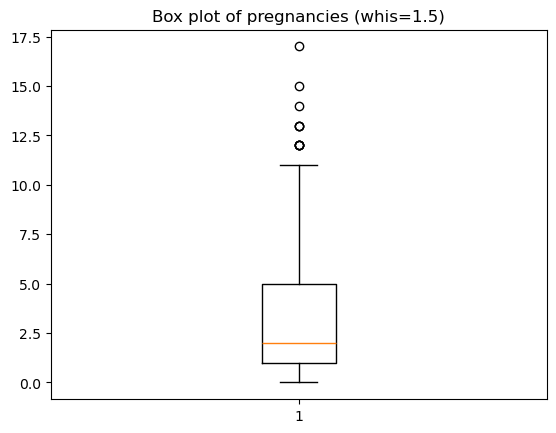

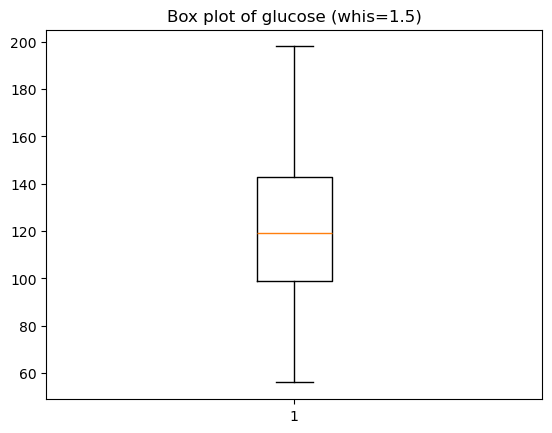

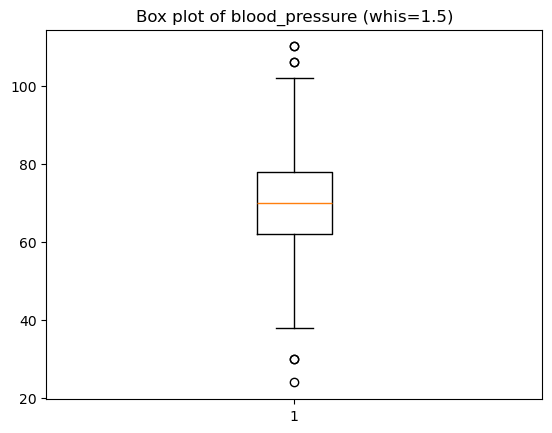

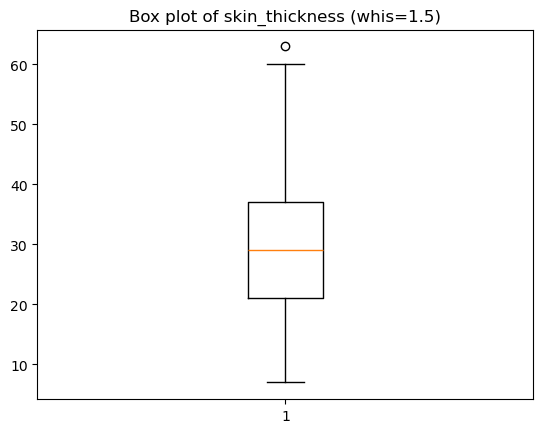

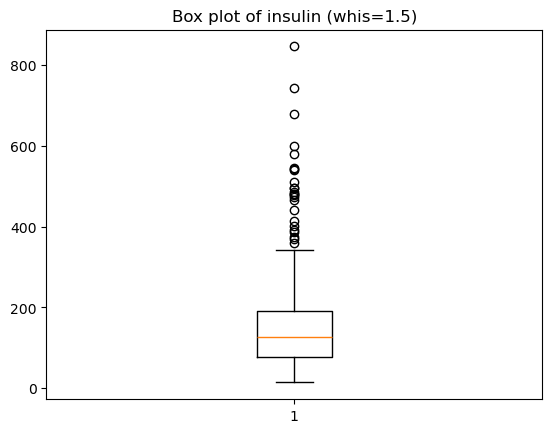

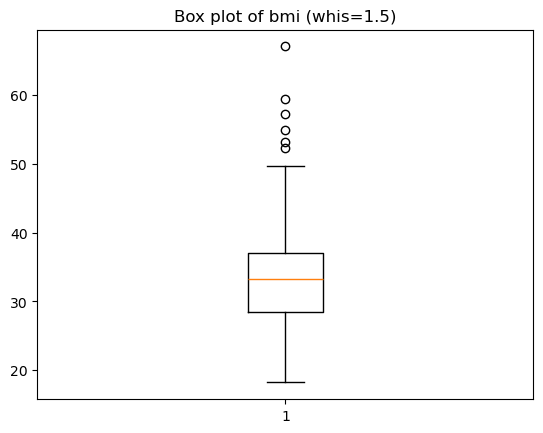

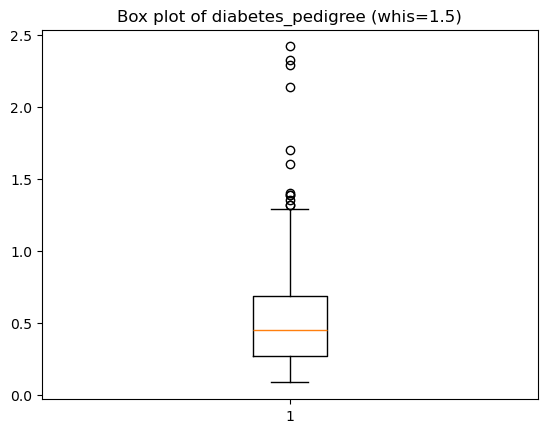

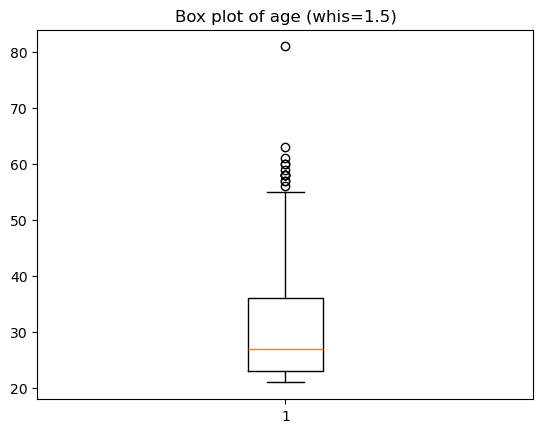

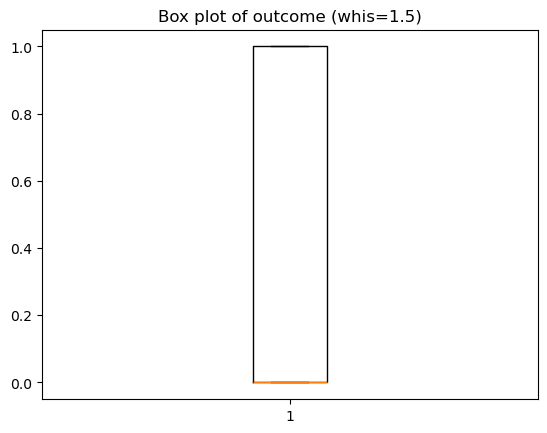

In [80]:
# outliers
import matplotlib.pyplot as plt
import numpy as np
for column_name in diabetes_df.columns:
  plt.boxplot(diabetes_df[column_name],whis=1.5)
  plt.title(f"Box plot of {column_name} (whis=1.5)")
  plt.show()

In [81]:
# winsorize outliers in 	pregnancies	blood_pressure	skin_thickness	insulin	bmi	diabetes_pedigree age	
# apply capping method for TOTAL_REVENUE
from scipy.stats.mstats import winsorize

# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the 
# value of the ninetieth percentile. 
for column in ('pregnancies',	'blood_pressure'	,'skin_thickness'	,'insulin'	,'bmi'	,'diabetes_pedigree', 'age'):
   diabetes_df['win_'+column] = winsorize(diabetes_df[column], (0, 0.10))

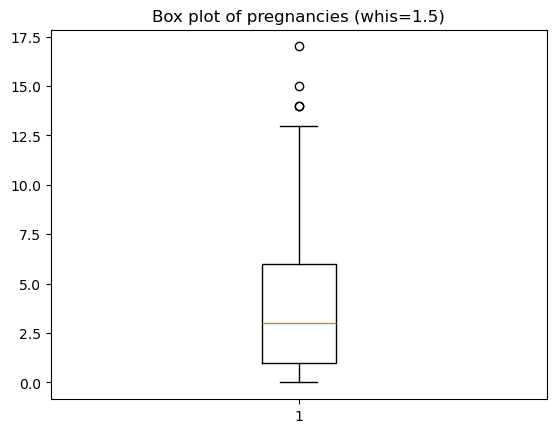

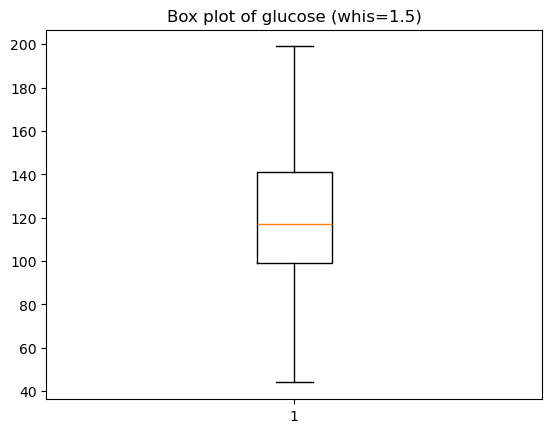

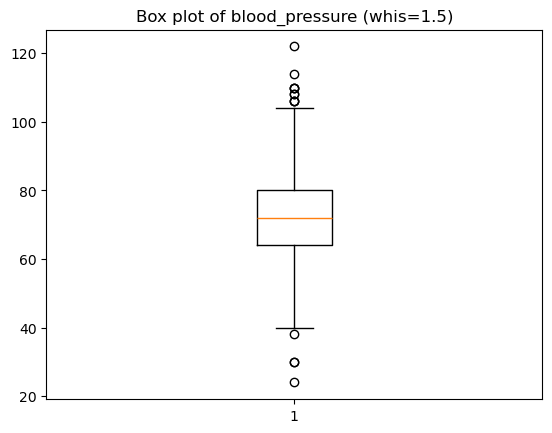

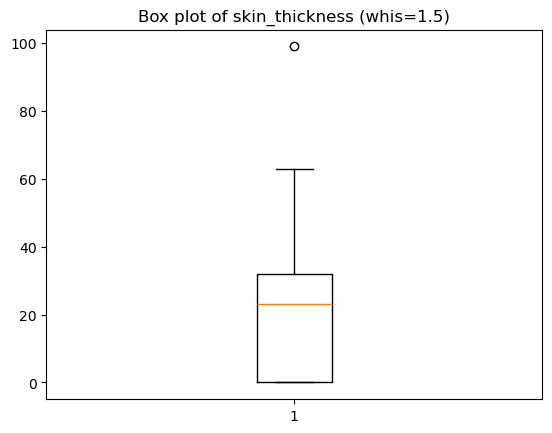

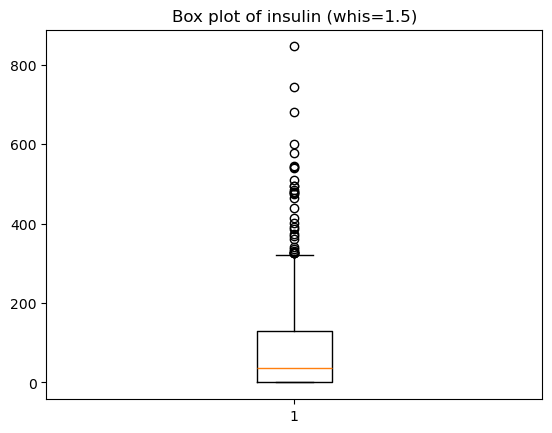

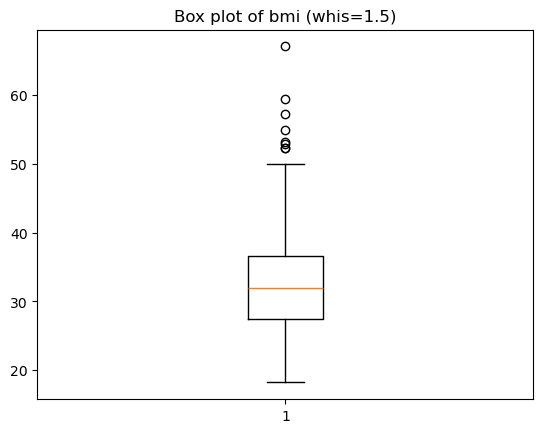

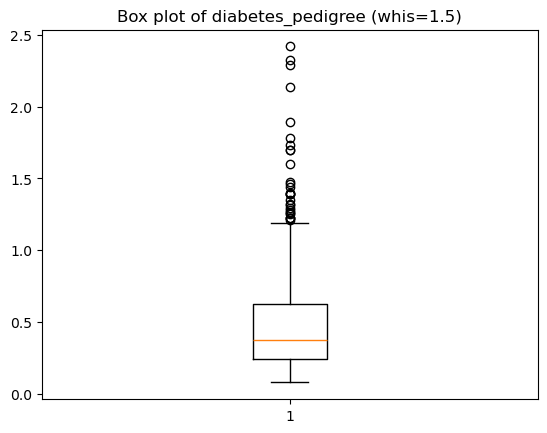

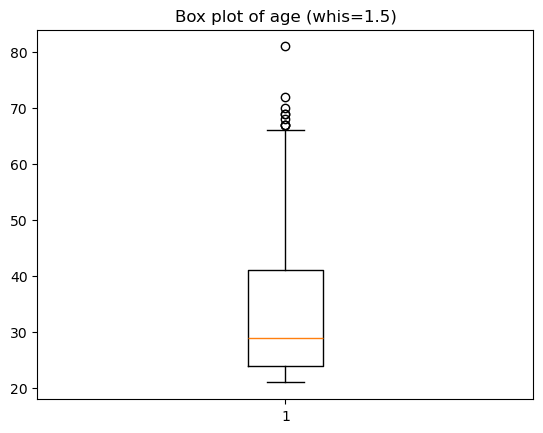

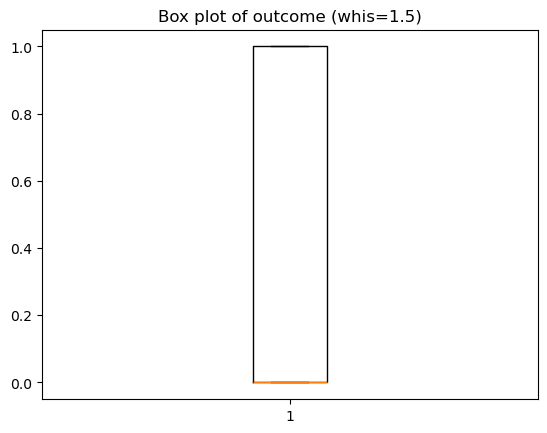

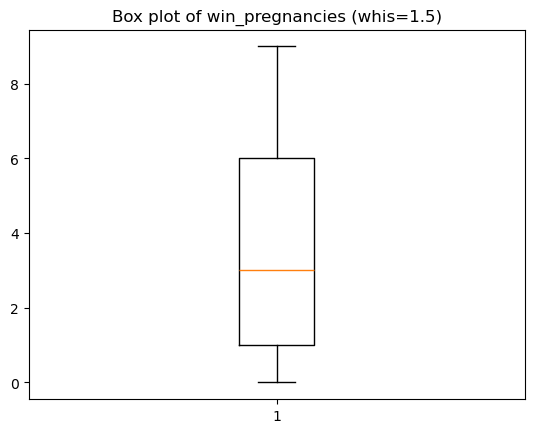

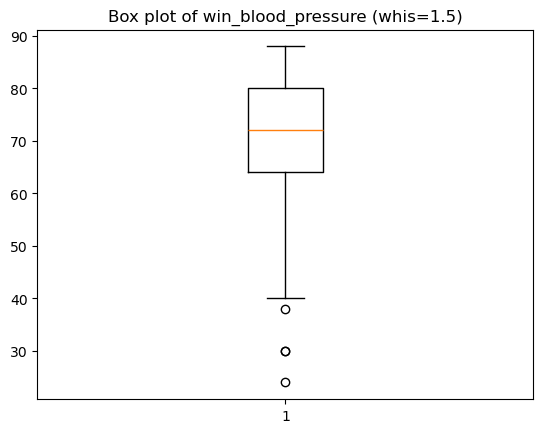

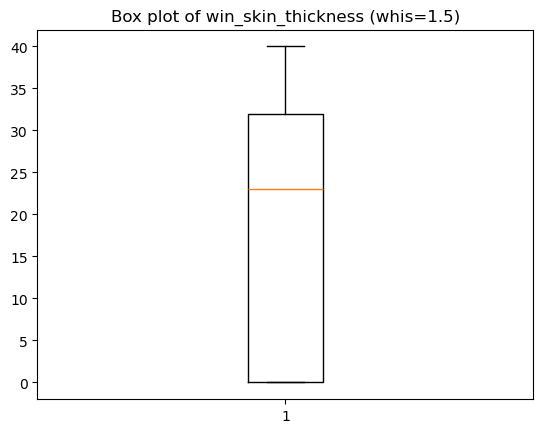

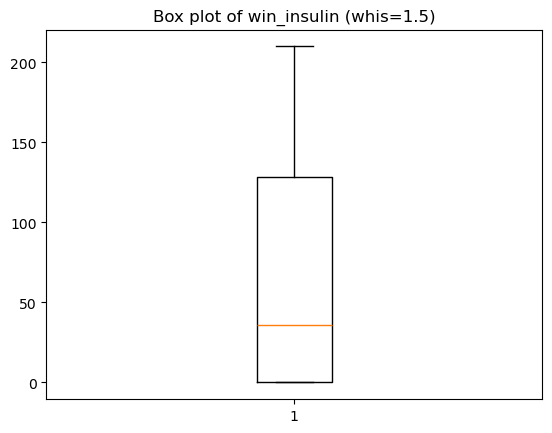

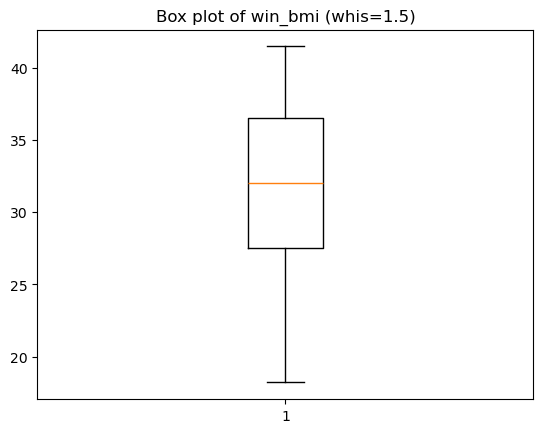

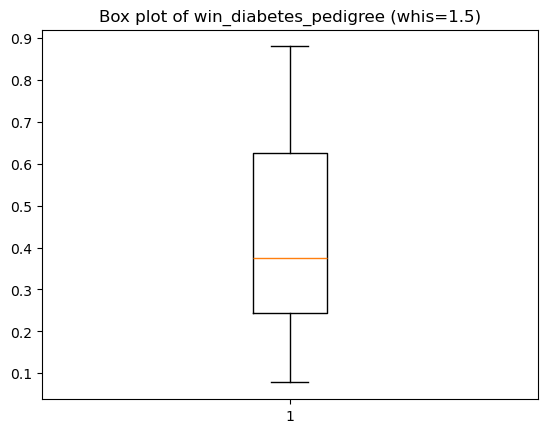

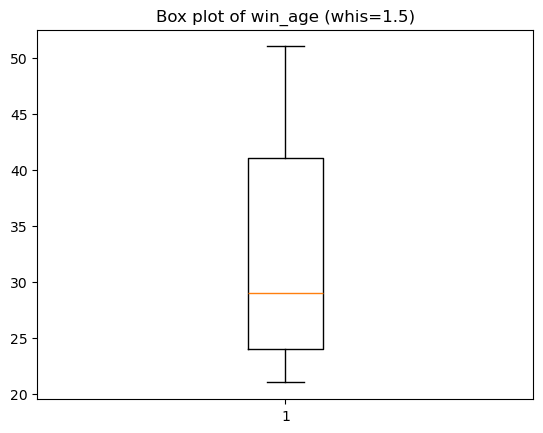

In [29]:
# replot 
for column_name in diabetes_df.columns:
  plt.boxplot(diabetes_df[column_name],whis=1.5)
  plt.title(f"Box plot of {column_name} (whis=1.5)")
  plt.show()

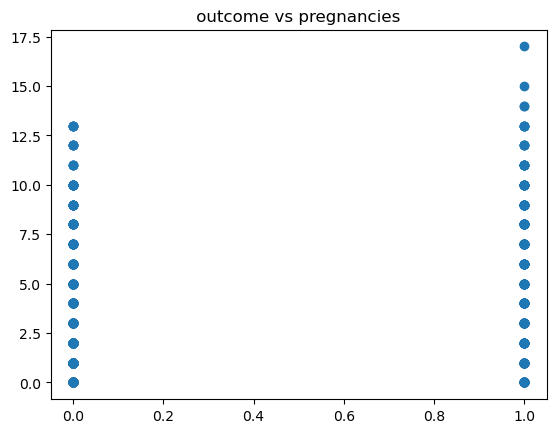

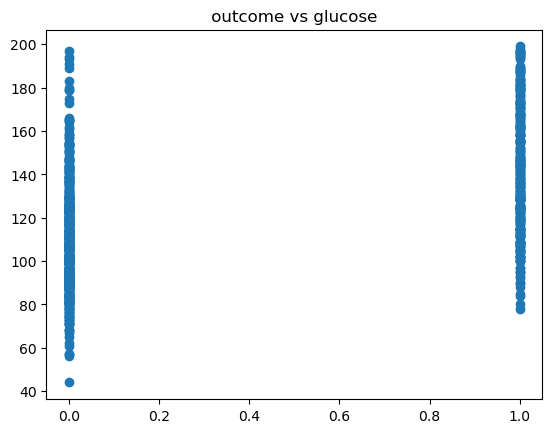

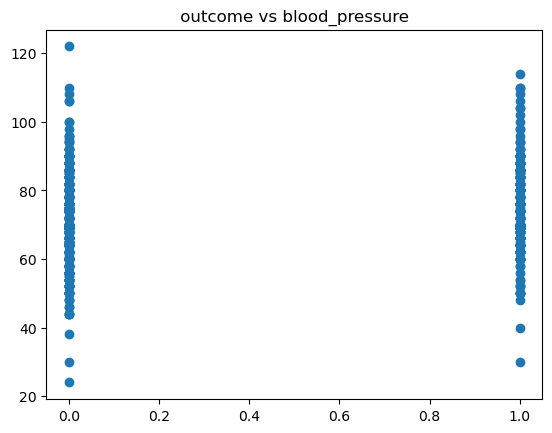

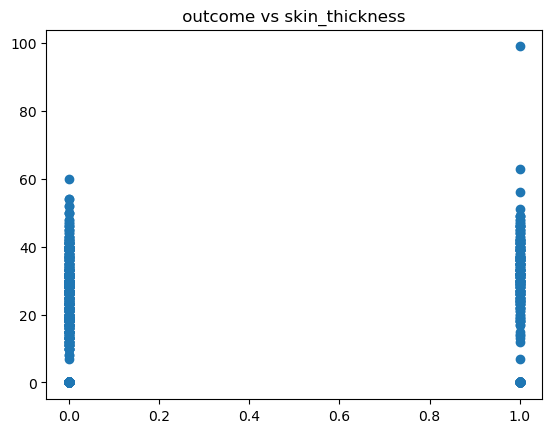

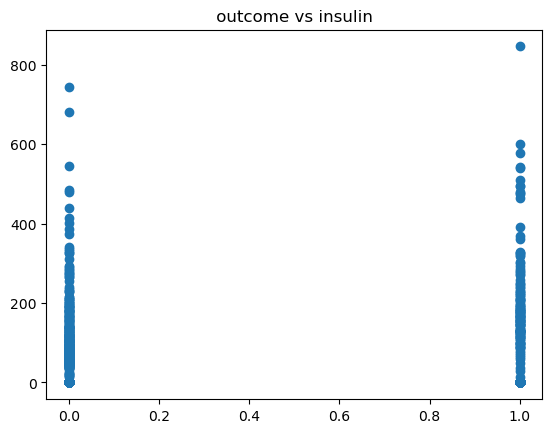

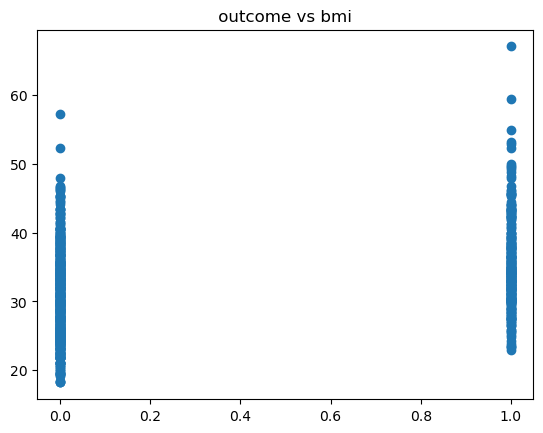

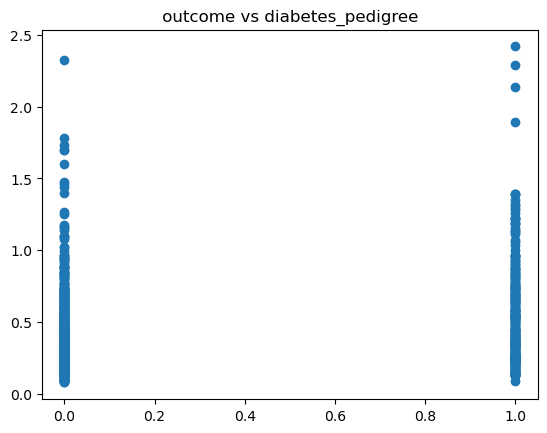

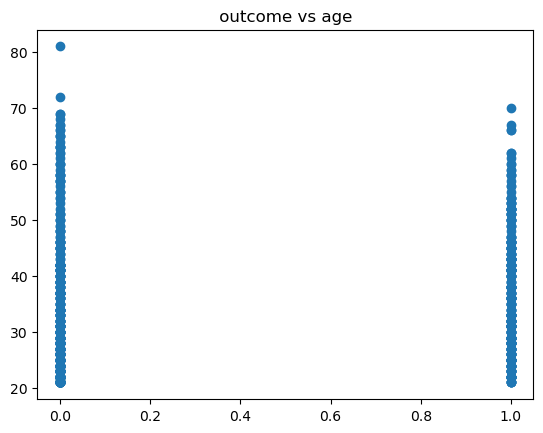

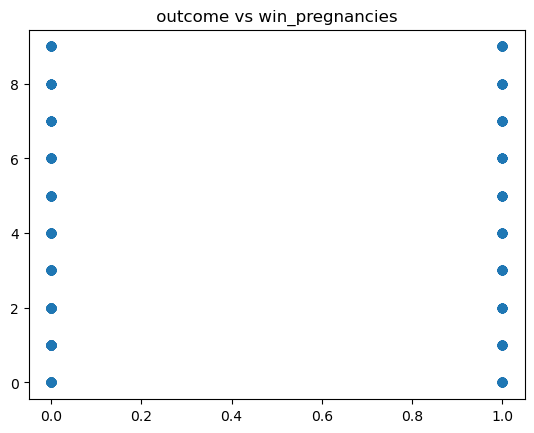

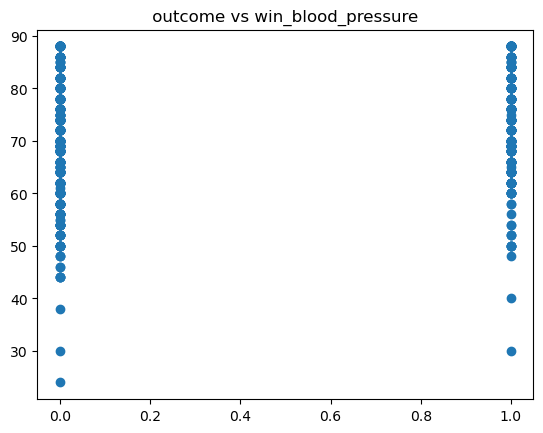

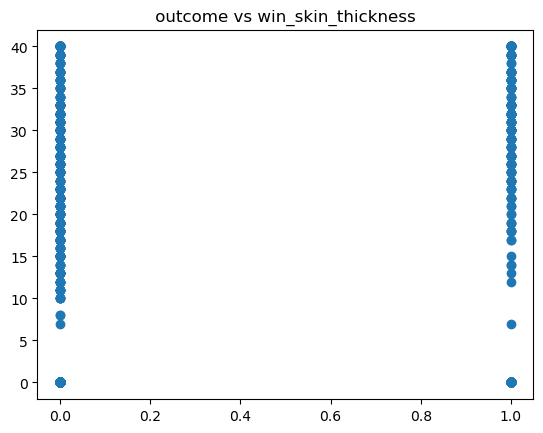

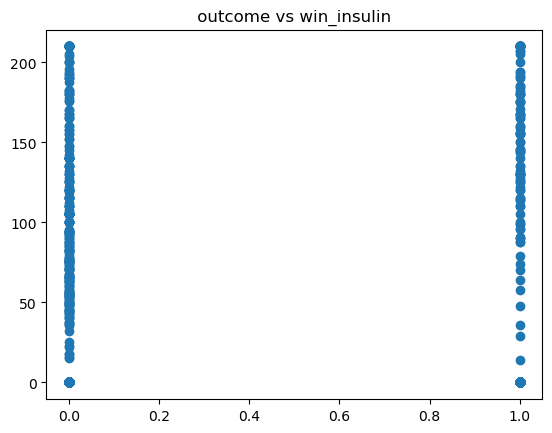

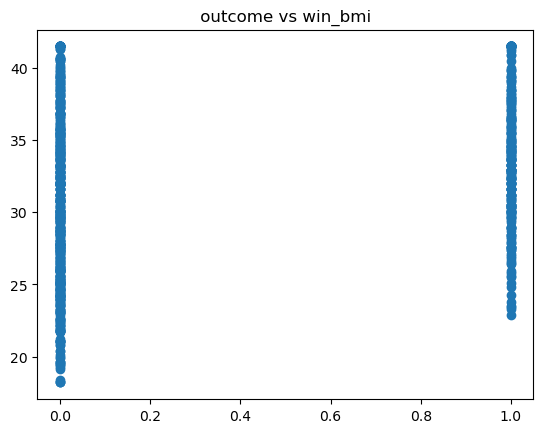

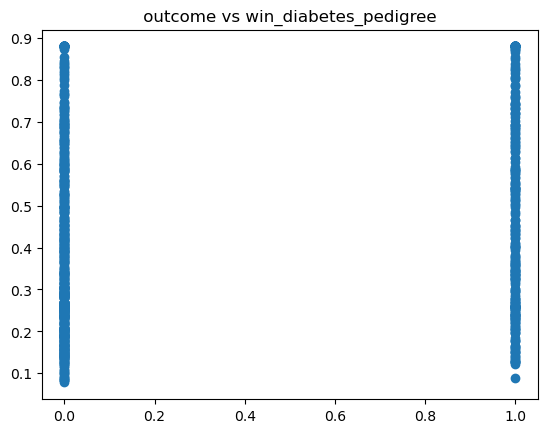

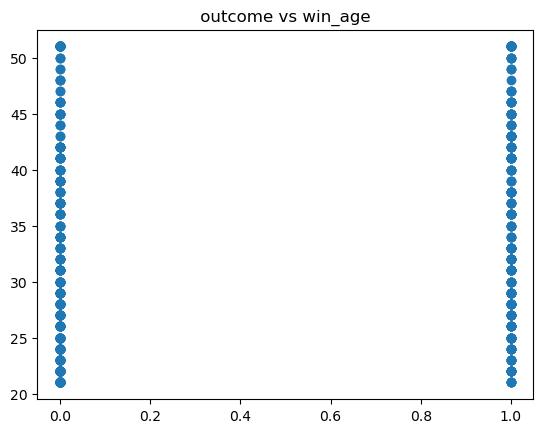

In [39]:
# univariate analysis 

# scatter plot 
for column_name1 in ('outcome',):
    for column_name2 in diabetes_df.columns:
     if column_name1 != column_name2:
       plt.scatter(diabetes_df[column_name1], diabetes_df[column_name2])
       plt.title(f' {column_name1} vs {column_name2} ')
       plt.show()
    
## Derive averages by group
#youtube_df.groupby("Grade").mean()

In [82]:
diabetes_wdf= diabetes_df[[ 'win_pregnancies','glucose','win_blood_pressure','win_skin_thickness','win_insulin','bmi','win_diabetes_pedigree','win_age','outcome']]
                           

In [83]:
diabetes_wdf.corr()

,win_pregnancies,glucose,win_blood_pressure,win_skin_thickness,win_insulin,bmi,win_diabetes_pedigree,win_age,outcome
win_pregnancies,1.000000,0.210833,0.202474,0.115314,0.145499,-0.049807,0.031678,0.718088,0.241629
glucose,0.210833,1.000000,0.214068,0.206966,0.621117,0.209516,0.104107,0.335475,0.515703
win_blood_pressure,0.202474,0.214068,1.000000,0.221402,0.137965,0.269612,-0.010736,0.308534,0.180325
win_skin_thickness,0.115314,0.206966,0.221402,1.000000,0.220677,0.652477,0.100341,0.201499,0.259652
win_insulin,0.145499,0.621117,0.137965,0.220677,1.000000,0.262112,0.128669,0.228259,0.347681
bmi,-0.049807,0.209516,0.269612,0.652477,0.262112,1.000000,0.119725,0.097717,0.270118
win_diabetes_pedigree,0.031678,0.104107,-0.010736,0.100341,0.128669,0.119725,1.000000,0.104534,0.205822
win_age,0.718088,0.335475,0.308534,0.201499,0.228259,0.097717,0.104534,1.000000,0.381802
outcome,0.241629,0.515703,0.180325,0.259652,0.347681,0.270118,0.205822,0.381802,1.000000


In [84]:
# Derive averages by group
diabetes_wdf.groupby("outcome").mean()

,win_pregnancies,glucose,win_blood_pressure,win_skin_thickness,win_insulin,bmi,win_diabetes_pedigree,win_age
outcome,,,,,,,,
0,2.610687,111.431298,68.610687,26.904580,122.332061,31.750763,0.452962,27.839695
1,3.961538,145.192308,72.953846,32.215385,180.676923,35.777692,0.563131,34.592308


In [85]:
# Test whether group differences are significant

import scipy.stats as stats
outcomes=(0,1)
grouped_df = diabetes_wdf.groupby("outcome")
for var in [ 'win_pregnancies','glucose','win_blood_pressure','win_skin_thickness','win_insulin','bmi','win_diabetes_pedigree','win_age']:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(outcomes)):
        for j in range(i+1, len(outcomes)):
            print("t-test between groups {0} and {1}:".format(outcomes[i], outcomes[j]))
            print(stats.ttest_ind(
                diabetes_wdf[diabetes_wdf["outcome"]==outcomes[i]][var], 
                diabetes_wdf[diabetes_wdf["outcome"]==outcomes[j]][var]
            ))

------------------------------------------------
Comparisons for variable: win_pregnancies
------------------------------------------------
t-test between groups 0 and 1:
TtestResult(statistic=-4.917512978797908, pvalue=1.2941181423999516e-06, df=390.0)
------------------------------------------------
Comparisons for variable: glucose
------------------------------------------------
t-test between groups 0 and 1:
TtestResult(statistic=-11.886902756072889, pvalue=5.096874741445402e-28, df=390.0)
------------------------------------------------
Comparisons for variable: win_blood_pressure
------------------------------------------------
t-test between groups 0 and 1:
TtestResult(statistic=-3.6204921811381583, pvalue=0.0003328183656708345, df=390.0)
------------------------------------------------
Comparisons for variable: win_skin_thickness
------------------------------------------------
t-test between groups 0 and 1:
TtestResult(statistic=-5.309836228807182, pvalue=1.8468157735388543e-

#In the feature-engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are highly correlated with the other ones or the variables that you think are irrelevant for predicting whether a patient has diabetes.

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
df2=diabetes_wdf[['win_pregnancies','glucose','win_blood_pressure','win_skin_thickness','win_insulin','bmi','win_diabetes_pedigree']]
pca2= pca.fit(df2)
print(pca.components_)
print(pca.explained_variance_)

[[ 5.08298342e-03  2.56745077e-01  2.14108053e-02  2.73426353e-02
   9.65561504e-01  2.32573417e-02  4.04522491e-04]
 [ 1.69646501e-02  9.59749856e-01  9.72453784e-02  4.06436378e-02
  -2.59060636e-01  1.92712924e-02  2.23783795e-04]
 [-2.68060983e-02  1.10604608e-01 -7.71909333e-01 -5.16992457e-01
   1.09631569e-02 -3.51855748e-01 -4.20152876e-04]
 [-2.76406932e-02  2.17745461e-02 -6.24215925e-01  6.90578806e-01
  -2.01042950e-02  3.63051909e-01  2.52620670e-03]]
[6672.23464033  554.51611778  142.64979546   91.22505188]


In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
X = diabetes_wdf[['win_pregnancies','glucose','win_blood_pressure','win_skin_thickness','win_insulin','bmi','win_diabetes_pedigree']]

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=5)
diabetes_wdf["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.33141842 0.18035411 0.15235208 0.13236075 0.1056168 ]


/var/folders/9_/1k3n4lms2cg9br6mjz1f_cq80000gp/T/ipykernel_15801/2529645811.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_wdf["pca_1"] = sklearn_pca.fit_transform(X)
